<a href="https://colab.research.google.com/github/OliviaLiGitHub/helloWorld/blob/master/faceAge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! rm -r '/content/faceAge'

In [9]:
!git clone https://github.com/OliviaLiGitHub/faceAge.git

Cloning into 'faceAge'...
remote: Enumerating objects: 1039, done.
remote: Total 1039 (delta 0), reused 0 (delta 0), pack-reused 1039
Receiving objects: 100% (1039/1039), 43.07 MiB | 46.72 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pylab as plt
import re

from keras.models import model_from_json
import h5py
from tensorflow import keras

Using TensorFlow backend.


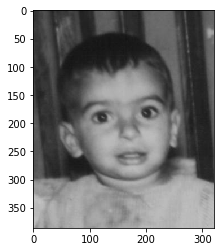

In [10]:
base_dir = '/content/faceAge/Images'
img  = image.load_img(base_dir + '/001A02.JPG')
plt.imshow(img)

In [13]:
images = glob.glob(base_dir + '/*.JPG')
train, val, test = images[:round(len(images)*0.7)], images[round(len(images)*0.7): round(len(images)*0.9)], images[round(len(images)*0.9):]
print("train: {} Images".format(len(train)))

train: 692 Images


import re

if not os.path.exists(os.path.join(base_dir, 'train/babys')):
    os.makedirs(os.path.join(base_dir, 'train/babys'))
if not os.path.exists(os.path.join(base_dir, 'train/children')):
    os.makedirs(os.path.join(base_dir, 'train/children'))
if not os.path.exists(os.path.join(base_dir, 'train/adults')):
    os.makedirs(os.path.join(base_dir, 'train/adults'))
if not os.path.exists(os.path.join(base_dir, 'train/olders')):
    os.makedirs(os.path.join(base_dir, 'train/olders'))
    
for t in train:
  age = re.findall(r".*\d{3}A(\d{2}).*\.JPG$", t)
  age = int(age[0])
  print(t)
  if age < 3:
    shutil.move(t,os.path.join(base_dir, 'train/babys'))
  elif age >= 3 and age < 18:
    shutil.move(t, os.path.join(base_dir, 'train/children'))
  elif age >= 18 and age < 48:    
    shutil.move(t, os.path.join(base_dir, 'train/adults'))
  else:
    shutil.move(t, os.path.join(base_dir, 'train/olders'))
    

In [0]:
import re
def ageGroup(groupName):
  if not os.path.exists(os.path.join(base_dir, groupName, 'babys')):
      os.makedirs(os.path.join(base_dir, groupName, 'babys'))
  if not os.path.exists(os.path.join(base_dir, groupName, 'children')):
      os.makedirs(os.path.join(base_dir, groupName, 'children'))
  if not os.path.exists(os.path.join(base_dir, groupName, 'adults')):
      os.makedirs(os.path.join(base_dir, groupName, 'adults'))
  if not os.path.exists(os.path.join(base_dir, groupName, 'olders')):
      os.makedirs(os.path.join(base_dir, groupName, 'olders'))
  if groupName == 'train':
    group = train
  elif groupName == 'val':
    group = val
  else:
    group = test
      
  for t in group:
    age = re.findall(r".*\d{3}A(\d{2}).*\.JPG$", t)
    age = int(age[0])
    
    if age < 3:
      shutil.move(t,os.path.join(base_dir, str(groupName), 'babys'))
    elif age >= 3 and age < 18:
      shutil.move(t, os.path.join(base_dir, groupName, 'children'))
    elif age >= 18 and age < 48:    
      shutil.move(t, os.path.join(base_dir, groupName, 'adults'))
    else:
      shutil.move(t, os.path.join(base_dir, groupName, 'olders'))

In [0]:
ageGroup('train')

In [0]:
ageGroup('val')

In [14]:
ageGroup('test')
'''
if not os.path.exists(os.path.join(base_dir, 'test')):
  os.makedirs(os.path.join(base_dir, 'test'))
for t in test:
  shutil.move(t, os.path.join(base_dir, 'test')) 
'''

"\nif not os.path.exists(os.path.join(base_dir, 'test')):\n  os.makedirs(os.path.join(base_dir, 'test'))\nfor t in test:\n  shutil.move(t, os.path.join(base_dir, 'test')) \n"

!rm -r '/content/faceAge/Images/train/adults'

transfer learning--waiting

In [0]:
#import tensorflow as tf
#tf.enable_eager_execution()

import tensorflow_hub as hub

from tensorflow.keras import layers

In [0]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2"
IMAGE_RES = 224

feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(IMAGE_RES, IMAGE_RES,3))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
def format_image(image, label):
  image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
  return image, label

BATCH_SIZE = 32
num_train = round(len(images)*0.7)
#len(os.listdir('/content/faceAge/Images/train/babys'))+len(os.listdir('/content/faceAge/Images/train/children'))+ len(os.listdir('/content/faceAge/Images/train/adults'))+len(os.listdir('/content/faceAge/Images/train/olders'))

train_batches      = train.shuffle(num_train//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = val.map(format_image).batch(BATCH_SIZE).prefetch(1)

AttributeError: ignored

In [0]:
feature_extractor.trainable = False

In [0]:
model = tf.keras.Sequential([
  feature_extractor,
  layers.Dense(4, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 4)                 5124      
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

regular CNN

In [1]:
BATCH_SIZE = 32
#IMG_SHAPE  = 150
IMG_SHAPE = 224
train_dir = os.path.join(base_dir, 'train')
image_gen = ImageDataGenerator(    
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE),
                                               class_mode='sparse'
                                              )

NameError: ignored

In [43]:
print(train_data_gen.class_indices)

{'adults': 0, 'babys': 1, 'children': 2, 'olders': 3}


In [32]:
val_dir = os.path.join(base_dir, 'val')
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse'
                                                )

Found 197 images belonging to 4 classes.


In [0]:
print(val_data_gen.class_indices)

{'adults': 0, 'babys': 1, 'children': 2, 'olders': 3}


In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [2]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

NameError: ignored

In [16]:
epochs=1
total_train = round(len(images)*0.7)
#total_val = round(len(images)*0.2)
total_val = len(os.listdir('/content/faceAge/Images/val/babys'))+len(os.listdir('/content/faceAge/Images/val/children'))+ len(os.listdir('/content/faceAge/Images/val/adults'))+len(os.listdir('/content/faceAge/Images/val/olders'))

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

22/22 [==============================] - 12s 544ms/step - loss: 1.1823 - acc: 0.4769 - val_loss: 1.1412 - val_acc: 0.3452


In [38]:
# Save the model
model.save('/content/drive/My Drive/path_to_my_model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
# Recreate the exact same model purely from the file
new_model = keras.models.load_model('/content/drive/My Drive/path_to_my_model.h5')

In [0]:
filenames = test_data_gen.filenames
nb_samples = len(filenames)
new_predicted = new_model.predict_generator(test_data_gen,steps = nb_samples)

In [21]:
predicted_class_indices=np.argmax(new_predicted,axis=1)
labels = (test_data_gen.class_indices)
print(predicted_class_indices)
print (labels)

[0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 2 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 0]
{'adults': 0, 'babys': 1, 'children': 2, 'olders': 3}


json--waiting

In [33]:
# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/My Drive/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [35]:
# load json and create model
with open('/content/drive/My Drive/model.json', 'r') as json_file:
  loaded_model_json = json_file.read()
  json_file.close()
  loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
''' 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
'''
model.load_weights('./model.h5')
model.predict(img)

ValueError: ignored

Predict

In [16]:
test_dir = os.path.join(base_dir, 'test')
image_gen_test = ImageDataGenerator(rescale=1./255)

test_data_gen = image_gen_test.flow_from_directory(batch_size=1,
                                                 directory=test_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 shuffle=False,  
                                                 class_mode=None
                                                )
test_data_gen.reset()

Found 99 images belonging to 4 classes.


In [0]:
print(test_data_gen.class_indices)

{'adults': 0, 'babys': 1, 'children': 2, 'olders': 3}


In [0]:
filenames = test_data_gen.filenames
nb_samples = len(filenames)

predicted = model.predict_generator(test_data_gen,steps = nb_samples)

In [0]:
predicted_class_indices=np.argmax(predicted,axis=1)
labels = (test_data_gen.class_indices)

In [0]:
print(predicted_class_indices)
print (labels)

[0 2 0 2 0 0 2 0 2 0 3 2 2 2 0 2 0 0 2 0 2 2 0 0 0 2 0 2 2 2 0 2 1 1 2 1 2
 2 2 0 2 1 1 1 2 2 2 2 2 1 1 2 2 2 2 3 2 2 2 0 2 2 1 0 0 2 2 0 0 1 0 2 0 2
 2 0 1 1 2 2 1 2 0 2 1 1 2 2 2 2 1 2 2 1 2 2 2 2 0]
{'adults': 0, 'babys': 1, 'children': 2, 'olders': 3}


labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [0]:
count = 0
fileNames = test_data_gen.filenames
for i in range(len(predicted_class_indices)):
  grp = fileNames[i]
  grp = re.findall(r"(\w*)\/\d{3}A\d{2}.*\.JPG$",grp)  
  if labels[grp[0]] == predicted_class_indices[i]:
    count += 1
   
print(count/len(predicted_class_indices))  

0.5353535353535354


In [0]:
! rm -r '/content/test1'

In [0]:
!git clone https://github.com/OliviaLiGitHub/test1.git

Cloning into 'test1'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 45 (delta 4), reused 0 (delta 0), pack-reused 28
Unpacking objects: 100% (45/45), done.


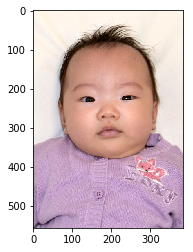

In [0]:
test_img_dir = '/content/test1'
img  = image.load_img(test_img_dir + '/Sophia China Visa.jpg')
plt.imshow(img)

loss, acc = model.evaluate_generator(test_data_gen, steps=nb_samples, verbose=1) #test_data_gen
不能直接用
test_data_gen.filenames
for i in range(predicted.shape[0]):
  print("index: {} label:{}".format(i, np.argmax(predicted[i])))

In [0]:
os.listdir(os.path.join(base_dir, 'test'))

['children', 'olders', 'adults', 'babys']

In [0]:
print(len(os.listdir(os.path.join(base_dir, 'test/olders'))))

2


In [0]:
print(len(os.listdir(os.path.join(base_dir, 'test/adults'))))

32


In [0]:
print(len(os.listdir(os.path.join(base_dir, 'test/babys'))))

12


In [0]:
print(len(os.listdir(os.path.join(base_dir, 'test/children'))))

53


Single image predict

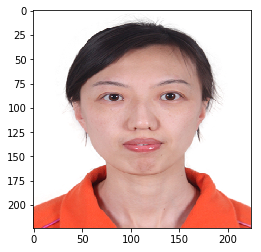

In [0]:
#'/Sophia China Visa.jpg'
#'/DSC02189.JPG'
#'/IMG_1302 35mm45mm.jpg'
img = image.load_img(test_img_dir + '/IMG_1302 35mm45mm.jpg', target_size=(IMG_SHAPE, IMG_SHAPE)) 
'''
plt.imshow(img)
img = tf.cast(img, tf.float32)
img /= 255
img = np.array([img])
'''

#img = test_data_gen[0][0][0]
plt.imshow(img)
#img = image.img_to_array(img)
#img = img.reshape((1,)+img.shape)

img = np.expand_dims(img, axis=0)/255

predicted = model.predict(img, batch_size=1)


In [0]:
print(predicted.shape)
print(predicted[0])
np.argmax(predicted[0])

(1, 4)
[0.11354847 0.20563135 0.6612242  0.01959597]


2

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
with open('/content/drive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/My\ Drive/foo.txt

Hello Google Drive!